In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # разделитель для выборки
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB # наивное баисевское распределение

sns.set()

# Adelie
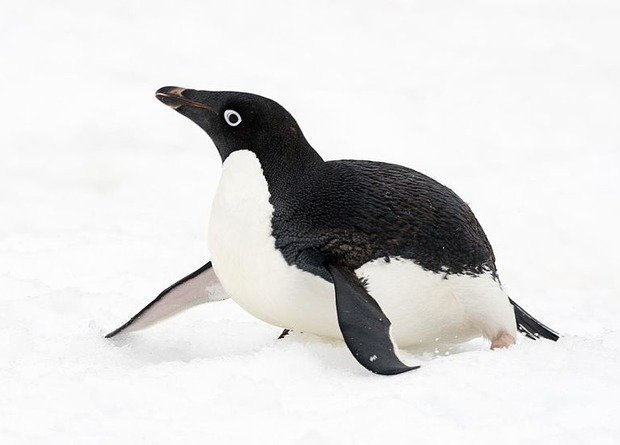

# Gentoo
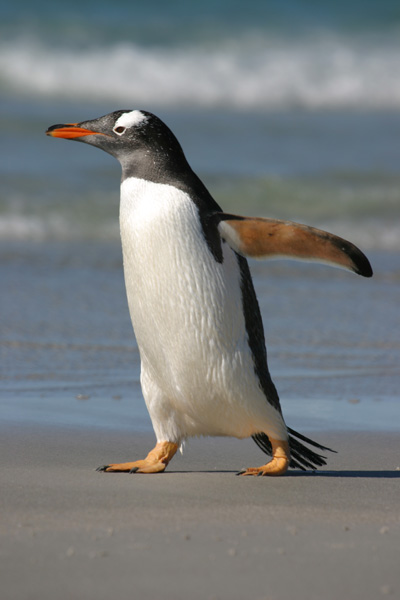

# Chinstrap
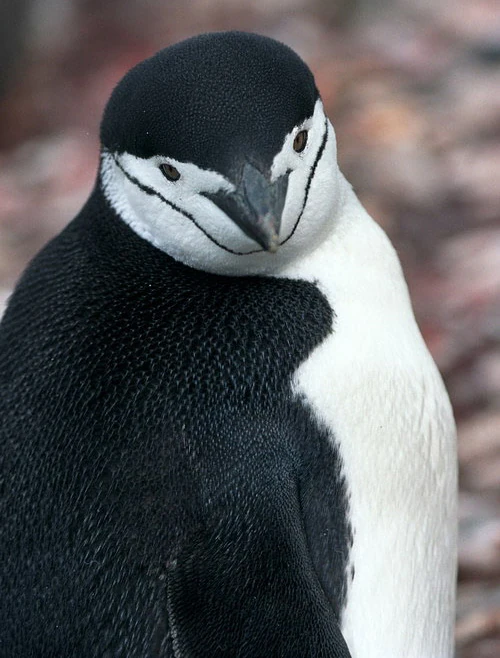

In [2]:
penguins = sns.load_dataset('penguins')

encode_pen = pd.get_dummies(penguins, columns=['island', 'sex'], dtype=int)
X_viz = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']]
sns.pairplot(data=X_viz, hue='species')

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,Adelie,NaN,NaN,NaN,NaN,0,0,1,0,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN,1,0,0,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [3]:
from sklearn.preprocessing import OneHotEncoder

Encoder = OneHotEncoder(sparse_output=False, dtype=int)
encode_matrix = Encoder.fit_transform(penguins[['island']])

columns = Encoder.get_feature_names_out(['island'])

df_enc = pd.DataFrame(encode_matrix, columns=columns)
peng_fr = penguins[['species',  'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']]
research_data = pd.concat([peng_fr, df_enc], axis=1)
research_data.dropna(inplace=True)
research_data

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1
...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,1,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0,0
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,0


In [4]:
X_p = research_data.drop('species', axis=1)
Y_p = research_data['species']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_p, Y_p, random_state=1) # разьиваем на тренерочную и тестовую выборки

model = GaussianNB() # создаем экземпляр модели
model.fit(Xtrain, Ytrain)
model_t = model.fit(Xtest, Ytest)

Y_res = model.predict(Xtest)
Y_t = model_t.predict(Xtrain)

print(f'{accuracy_score(Y_res, Ytest)}')
print(f'{accuracy_score(Y_t, Ytrain)}')

0.9186046511627907
0.859375


C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


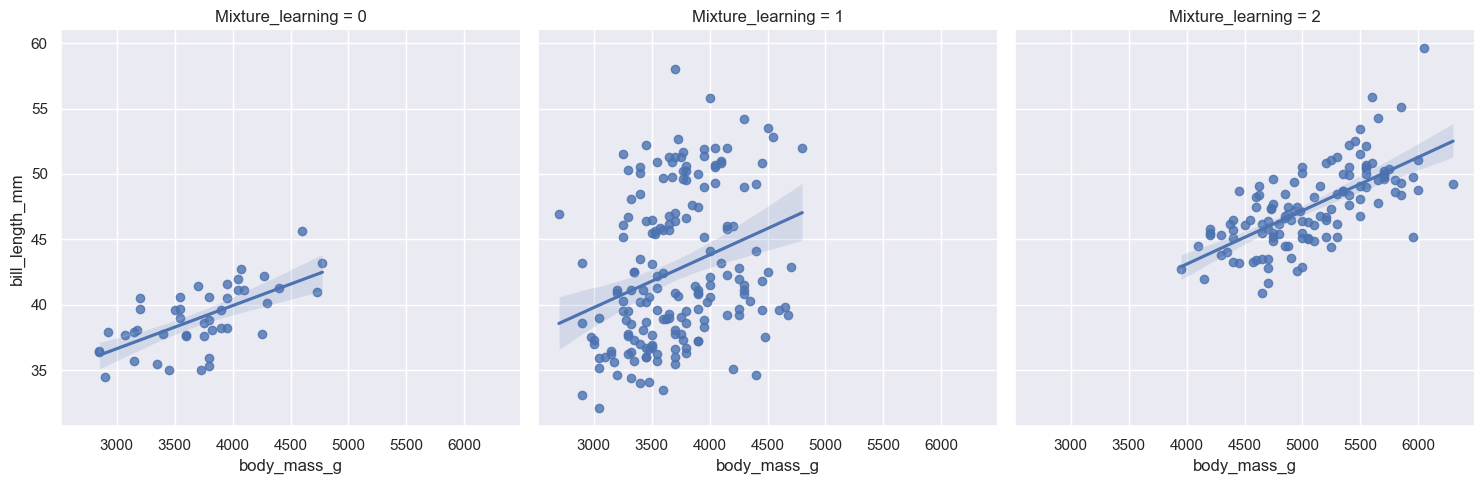

In [5]:
from sklearn.mixture import GaussianMixture
Mixture = GaussianMixture(n_components=3)
Mixture.fit(X_p)
groups = Mixture.predict(X_p)
research_data['Mixture_learning'] = groups
sns.lmplot(research_data, x='body_mass_g', y='bill_length_mm', col='Mixture_learning')

C:\Users\Home\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


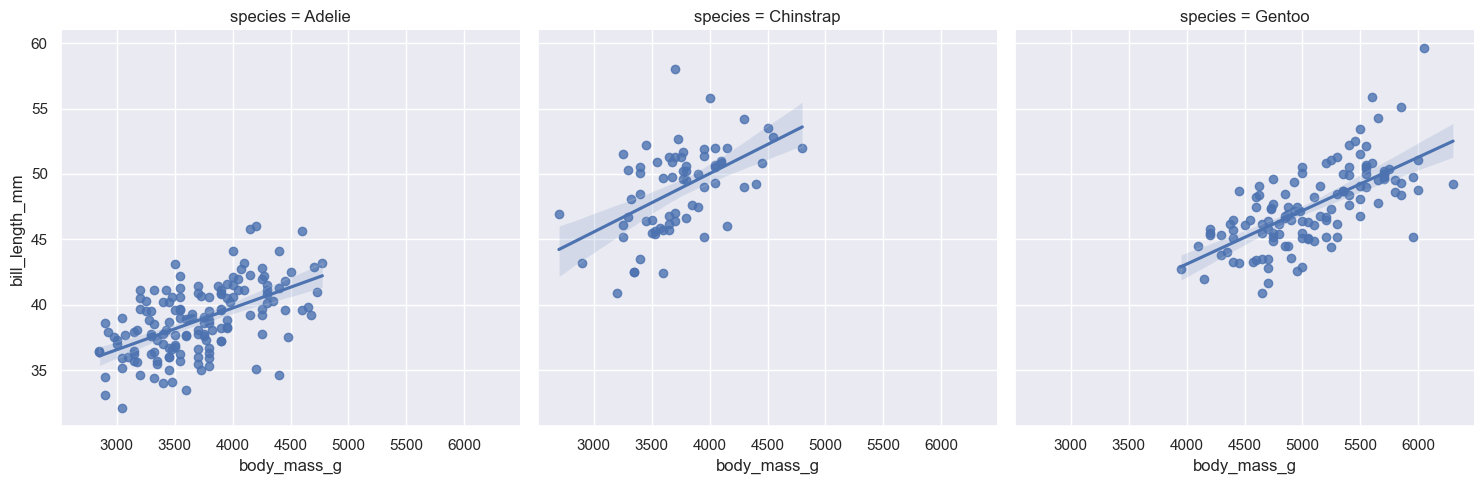

In [6]:
sns.lmplot(research_data, x='body_mass_g', y='bill_length_mm', col='species')